In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import label_binarize, StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_digits

from sklearn.naive_bayes import GaussianNB

# https://github.com/mrahtz/machine-learning-classification/blob/master/module6_cross-validation-and-grid-search.py
# https://www.codementor.io/mgalarny/making-your-first-machine-learning-classifier-in-scikit-learn-python-db7d7iqdh
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
# http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

## Вопросы:

0. какой алгоритм страдает от избытка инфы
0. выставить все фичи, и глубину получше, отсортировать признаки по важности
   -> проклятие размерности
0. 

# 3 Task

In [12]:
#mnist = fetch_mldata('MNIST original') имеют размер 28x28
#sz = 28
mnist = load_digits()
sz = 8



X, y = mnist.data, mnist.target
rnd_state = np.random.randint(0, X.shape[0])
print(X.shape, rnd_state)

(1797, 64) 1246


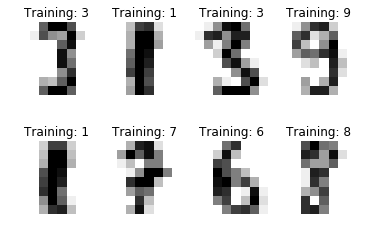

In [13]:
images_and_labels = list(zip(X, y))

for index, (image, label) in enumerate(images_and_labels[rnd_state:rnd_state + 8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape([sz,sz]), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [14]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=rnd_state)

In [5]:
tree = DecisionTreeClassifier(max_depth=5, random_state=rnd_state)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=rnd_state)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.9721142358516432


In [6]:
tree_pred = tree.predict(X_holdout)
print(accuracy_score(y_holdout, tree_pred))

knn_pred = knn.predict(X_holdout)
print(accuracy_score(y_holdout, knn_pred))

0.6537037037037037
0.9796296296296296


## Cross Val Tree

In [7]:
tree_params = {'max_depth': [2**i for i in range(6)],
'max_features': [2**i for i in range(6)]}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [8]:
tree_grid.fit(X_train, y_train)
print("Fit end")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fit end


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.3s finished


In [9]:
print(tree_grid.best_params_, tree_grid.best_score_)

{'max_depth': 16, 'max_features': 32} 0.8361177406523469


In [10]:
print(accuracy_score(y_holdout, tree_grid.predict(X_holdout)))

0.8518518518518519


## Cross Val KNN

In [11]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

In [12]:
knn_grid.fit(X_train, y_train)
print("Fit end")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fit end


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.8s finished


In [13]:
print(knn_grid.best_params_, knn_grid.best_score_)

{'knn__n_neighbors': 5} 0.9713603818615751


In [14]:
print(accuracy_score(y_holdout, knn_grid.predict(X_holdout)))

0.9777777777777777


## Cross Val Forest

In [15]:
forest_params = {'max_depth': [2**i for i in range(6)],
'max_features': [2**i for i in range(6)]}

forest_grid = GridSearchCV(forest, forest_params,
cv=5, n_jobs=-1,
verbose=True)

In [16]:
forest_grid.fit(X_train, y_train)
print("Fit end")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   23.2s finished


Fit end


In [17]:
print(forest_grid.best_params_, forest_grid.best_score_)

{'max_depth': 32, 'max_features': 4} 0.9769291964996022


In [18]:
print(accuracy_score(y_holdout, forest_grid.predict(X_holdout)))

0.975925925925926


## Naive Bayes

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [20]:
gnb_pred = gnb.predict(X_holdout) # Нечего подбирать
print(accuracy_score(y_holdout, gnb_pred))

0.8055555555555556


## 2 Вопрос

In [15]:
tree = DecisionTreeClassifier(max_depth=5, random_state=rnd_state)
tree_params = {'max_depth': [2**i for i in range(6)],
'max_features': [X.shape[1]]}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [16]:
tree_grid.fit(X_train, y_train)
print("Fit end")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fit end


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [17]:
print(tree_grid.best_params_, tree_grid.best_score_)

{'max_depth': 8, 'max_features': 64} 0.8273667462211615


In [18]:
print(accuracy_score(y_holdout, tree_grid.predict(X_holdout)))

0.8462962962962963


In [24]:
fi = tree_grid.best_estimator_.feature_importances_
len(fi)

64

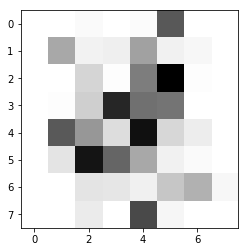

In [29]:
plt.imshow(fi.reshape([sz,sz]), cmap=plt.cm.gray_r, interpolation='nearest')
